<a href="https://colab.research.google.com/github/rafaelOsoriog/pruebas_saber_pro_colombia/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carga de dataset desde kaggle

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving udea-ai4eng-20241.zip to udea-ai4eng-20241.zip


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle competitions download -c udea-ai4eng-20241

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! unzip udea-ai4eng-20241.zip

Archive:  udea-ai4eng-20241.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


## Exploración del dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [32]:
train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_TIENELAVADORA              652727 non-null  object
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object
 12  ESTU_PAGOMATRICULAPROPIO      

Se observa que la base de datos de entrenamiento consta de 692500 observaciones y 17 variables que incluyen 2 variables discretas, 14 variables categoricas y la variable de resultado RENDIMIENTO_GLOBAL

In [ ]:
test.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa


In [21]:
train.PERIODO.value_counts()

20195    180873
20203    171838
20212    171412
20183    164818
20194      1472
20213      1178
20202       490
20184       254
20196       165
Name: PERIODO, dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296786 entries, 0 to 296785
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              296786 non-null  int64 
 1   PERIODO                         296786 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             296786 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          296786 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  294063 non-null  object
 5   ESTU_HORASSEMANATRABAJA         283407 non-null  object
 6   FAMI_ESTRATOVIVIENDA            282991 non-null  object
 7   FAMI_TIENEINTERNET              285247 non-null  object
 8   FAMI_EDUCACIONPADRE             286793 non-null  object
 9   FAMI_TIENELAVADORA              279527 non-null  object
 10  FAMI_TIENEAUTOMOVIL             277868 non-null  object
 11  ESTU_PRIVADO_LIBERTAD           296786 non-null  object
 12  ESTU_PAGOMATRICULAPROPIO      

###Exploración individua de datos

In [24]:
train.PERIODO.value_counts()

20195    180873
20203    171838
20212    171412
20183    164818
20194      1472
20213      1178
20202       490
20184       254
20196       165
Name: PERIODO, dtype: int64

In [23]:
train.ESTU_PRGM_ACADEMICO.value_counts()

DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                           1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES                    1
ADMINISTRACION DE COMERCIO EXTERIOR                           1
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES        1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: ESTU_PRGM_ACADEMICO, Length: 948, dtype: int64

In [25]:
train.FAMI_ESTRATOVIVIENDA.value_counts()

Estrato 2      232671
Estrato 3      210685
Estrato 1      111991
Estrato 4       65514
Estrato 5       23608
Estrato 6       12605
Sin Estrato      3289
Name: FAMI_ESTRATOVIVIENDA, dtype: int64

In [26]:
train.FAMI_EDUCACIONPADRE.value_counts()

Secundaria (Bachillerato) completa      128289
Primaria incompleta                     125675
Educación profesional completa           83117
Secundaria (Bachillerato) incompleta     71654
Técnica o tecnológica completa           62995
Primaria completa                        55958
Postgrado                                44169
Educación profesional incompleta         27084
Técnica o tecnológica incompleta         22552
Ninguno                                  22008
No sabe                                  16592
No Aplica                                 9229
Name: FAMI_EDUCACIONPADRE, dtype: int64

##Evalución de valores nulos

In [14]:
print(train.isnull().values.any())
print(test.isnull().values.any())

True
True


En ambos dataset se encuentran campos con valores nulos, es necesario realizar un pre-procesamiento, estandarizacion o llenado de datos nulos.

##Evalución de datos duplicados

In [15]:
print("datos duplicados en train:", train.duplicated().sum())
print("datos duplicados en train:", test.duplicated().sum())

datos duplicados en train: 0
datos duplicados en train: 0


No se encuentran datos duplicados en los dataset

##Histograma

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'PERIODO'}>]], dtype=object)

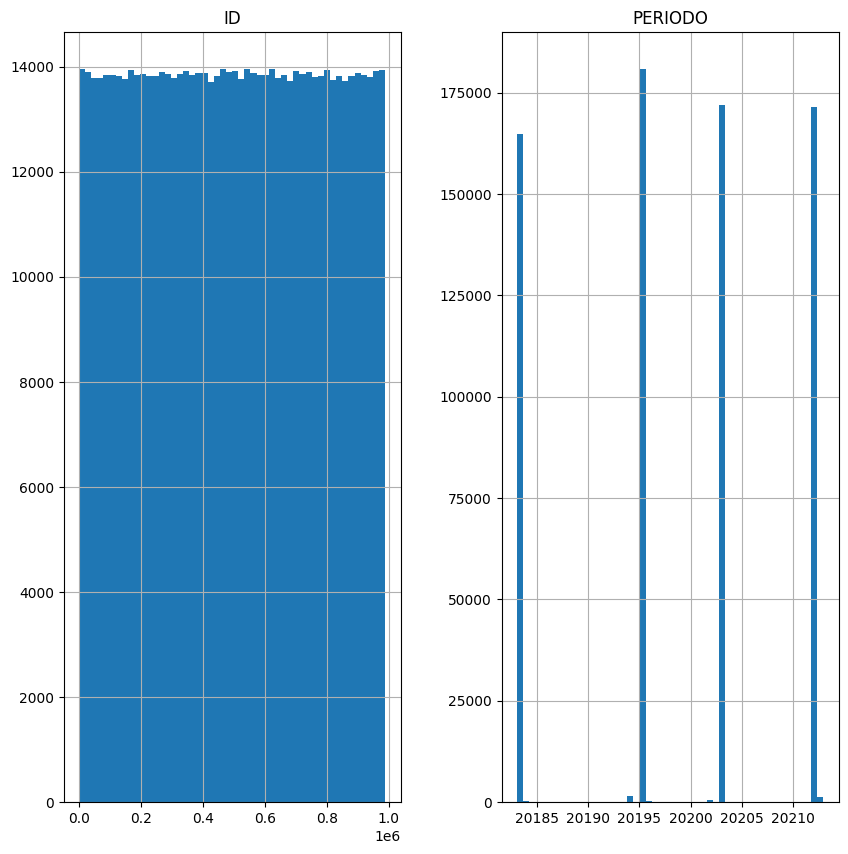

In [35]:
train.hist(bins=50, figsize=(10,10))

Se realiza el histograma y solo se puede visualizar las dos variables discretas, para las demás variables se debe realizar un pre-procesamiento de los datos categorigos para analizar su comportamiento y la respectiva analitica.